In [21]:
import datetime
from pathlib import Path
import matplotlib.pyplot as plt
import polars as pl

DATA_DIR = Path("../data")

In [10]:
df = pl.read_csv(DATA_DIR / "PJME_hourly.csv")
df = df.rename({"Datetime": "ds", "PJME_MW": "y"})
df = df.with_columns(
    pl.col("ds").str.to_datetime(time_unit="ns")
)

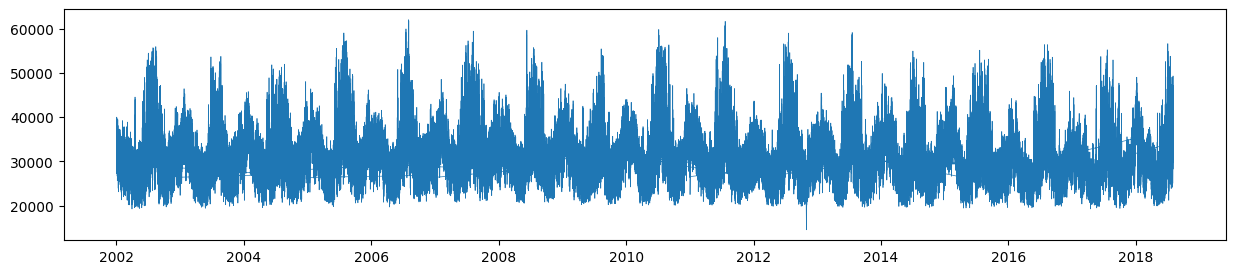

In [31]:
_, ax = plt.subplots(figsize=(15, 3))
ax.plot(df["ds"], df["y"], linewidth=0.5);

適当に3年分抽出して、年間傾向を描画してみる。  
3年とも夏場と冬場にピークがあり、夏場の方がそのピークは大きい。

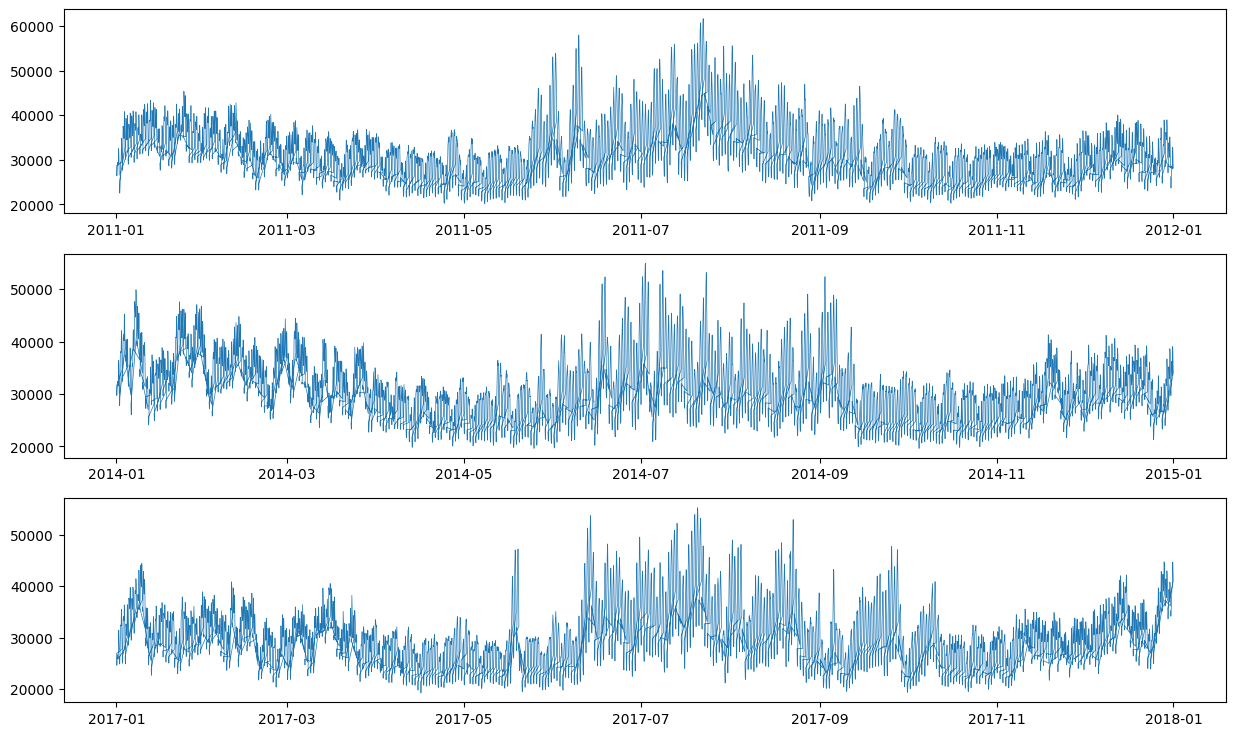

In [28]:
target_years = [2011, 2014, 2017]
_, axes = plt.subplots(len(target_years), 1, figsize=(15, 3*len(target_years)))
for i, year in enumerate(target_years):
    target_df = df.filter((pl.col("ds") > datetime.datetime(year, 1, 1)) & (pl.col("ds") < datetime.datetime(year + 1, 1, 1)))
    axes[i].plot(target_df["ds"], target_df["y"], linewidth=0.5)